In [16]:
#pobranie danych

import pandas as pd
df = pd.read_csv('ViewingActivity.csv')

In [ ]:
# Zmiana nazw kolumn na polskie nazwy
df = df.rename(columns = {'Start Time': 'Czas rozpoczecia',
                          'Duration': 'Czas trwania',
                          'Title': 'Tytul'})


In [ ]:
# Zmiana nazw kolumn na polskie nazwy
df = df.rename(columns = {'Start Time': 'Czas rozpoczecia',
                          'Duration': 'Czas trwania',
                          'Title': 'Tytul'})


In [ ]:
# Zmiana nazw kolumn na polskie nazwy
df = df.rename(columns = {'Start Time': 'Czas rozpoczecia',
                          'Duration': 'Czas trwania',
                          'Title': 'Tytul'})


In [17]:
#ilośc wierszy i kolumn w zbiorze danych
df.shape

(10862, 10)

In [18]:
#wyświetla 5 pierwszych rekordów
df.head(5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Beata,2023-02-25 20:45:18,01:41:25,NaN,Za duży na bajki,NaN,Sony PS4,01:41:25,01:41:25,PL (Poland)
1,Beata,2023-02-25 20:44:14,00:00:56,NaN,Zwiastun: Za duży na bajki,TRAILER,Sony PS4,00:00:56,00:00:56,PL (Poland)
2,Beata,2023-02-25 20:44:01,00:00:09,Autoplayed: user action: None;,Za duży na bajki,NaN,Sony PS4,00:00:09,Not latest view,PL (Poland)
3,Beata,2023-02-25 20:43:29,00:00:07,Autoplayed: user action: None;,Czerwona nota,NaN,Sony PS4,00:00:07,00:00:07,PL (Poland)
4,Beata,2023-02-25 20:42:41,00:00:06,Autoplayed: user action: None;,U ciebie czy u mnie? (teaser): U ciebie czy u ...,TEASER_TRAILER,Sony PS4,00:00:06,00:00:06,PL (Poland)


In [19]:
#usuwamy niepotrzebne tabele, w naszym przypadku chcemy przeanalizować ile i kiedy oglądaliśmy "Dom z papier"

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(5) 

,Start Time,Duration,Title
0,2023-02-25 20:45:18,01:41:25,Za duży na bajki
1,2023-02-25 20:44:14,00:00:56,Zwiastun: Za duży na bajki
2,2023-02-25 20:44:01,00:00:09,Za duży na bajki
3,2023-02-25 20:43:29,00:00:07,Czerwona nota
4,2023-02-25 20:42:41,00:00:06,U ciebie czy u mnie? (teaser): U ciebie czy u ...


In [20]:
# Zmiana nazw kolumn na polskie nazwy
df = df.rename(columns = {'Start Time': 'Czas rozpoczecia',
                          'Duration': 'Czas trwania',
                          'Title': 'Tytul'})


In [21]:
#sprawdzanie jakie mamy formaty znaków w tabelkach
df.dtypes

Czas rozpoczecia    object
Czas trwania        object
Tytul               object
dtype: object

In [22]:
#zmiana foramtu danych abyśmy mogli operować na tych danych i je sumować jako datetime oraz żeby te dane miały naszą lokalną strefę czasową
df['Czas rozpoczecia'] = pd.to_datetime(df['Czas rozpoczecia'], utc=True)
df.dtypes

Czas rozpoczecia    datetime64[ns, UTC]
Czas trwania                     object
Tytul                            object
dtype: object

In [23]:
#zmieniamy kolumne Czas rozpoczecia na index aby moć przeprowadzić konwersje danych
df = df.set_index('Czas rozpoczecia')

#konwertuje czas na polski
df.index = df.index.tz_convert('Europe/Warsaw')

#zmieniamy kolumne w wcześniejszy typ danych 
df = df.reset_index()

df.head(5)

,Czas rozpoczecia,Czas trwania,Tytul
0,2023-02-25 21:45:18+01:00,01:41:25,Za duży na bajki
1,2023-02-25 21:44:14+01:00,00:00:56,Zwiastun: Za duży na bajki
2,2023-02-25 21:44:01+01:00,00:00:09,Za duży na bajki
3,2023-02-25 21:43:29+01:00,00:00:07,Czerwona nota
4,2023-02-25 21:42:41+01:00,00:00:06,U ciebie czy u mnie? (teaser): U ciebie czy u ...


In [24]:
#konwersja kolumny na typ danych który rozumie tą kolumne jako czas trwania a nie datetime
df['Czas trwania'] = pd.to_timedelta(df['Czas trwania'])
df.dtypes

Czas rozpoczecia    datetime64[ns, Europe/Warsaw]
Czas trwania                      timedelta64[ns]
Tytul                                      object
dtype: object

In [25]:
#sprawdzamy pod jaką konkretnie nazwą widnieje serial Dom z papieru
df[df['Tytul'].str.contains('Dom z')]

,Czas rozpoczecia,Czas trwania,Tytul
288,2022-07-04 14:17:25+02:00,0 days 00:00:35,Sezon 1 (Klip): Dom z papieru: Korea
366,2022-01-07 20:06:38+01:00,0 days 00:33:26,Dom z papieru: Część 1: Odcinek 1 (Odcinek 1)
367,2022-01-07 20:05:16+01:00,0 days 00:00:07,Dom z papieru: Część 1: Odcinek 1 (Odcinek 1)
368,2022-01-06 15:49:23+01:00,0 days 00:13:27,Dom z papieru: Część 1: Odcinek 1 (Odcinek 1)
369,2022-01-06 15:45:46+01:00,0 days 00:01:18,Dom z papieru (zwiastun)
...,...,...,...
10482,2018-10-19 12:49:08+02:00,0 days 00:49:48,Dom z papieru: Część 1: Odcinek 4 (Odcinek 4)
10483,2018-10-17 15:24:20+02:00,0 days 00:00:01,Dom z papieru: Część 1: Odcinek 4 (Odcinek 4)
10484,2018-10-17 14:06:27+02:00,0 days 00:49:55,Dom z papieru: Część 1: Odcinek 3 (Odcinek 3)
10485,2018-10-17 13:25:51+02:00,0 days 00:39:20,Dom z papieru: Część 1: Odcinek 2 (Odcinek 2)


In [26]:
#towrzymy zmienną która filtruje dane z naszego serialu
domZPapieru = df[df['Tytul'].str.contains('Dom z', regex=False)]

In [27]:
#odfliltrowanie krótkich czasów trwania
domZPapieru = domZPapieru[(domZPapieru['Czas trwania'] > '0 days 00:01:00')]
domZPapieru.shape

(67, 3)

In [28]:
#Ila czasu spędziliśmy na oglądaniu Dom z papieru?
domZPapieru['Czas trwania'].sum()

Timedelta('1 days 14:23:38')

In [29]:
#W które dni tygodnia najwięcej obejrzałem odcinków Dom z papieru?
#W jakich godzinach zaczynam oglądać serial?

domZPapieru['Dzien_tygodnia'] = domZPapieru['Czas rozpoczecia'].dt.weekday
domZPapieru['Godzina'] = domZPapieru['Czas rozpoczecia'].dt.hour

domZPapieru.head(1)

,Czas rozpoczecia,Czas trwania,Tytul,Dzien_tygodnia,Godzina
366,2022-01-07 20:06:38+01:00,0 days 00:33:26,Dom z papieru: Część 1: Odcinek 1 (Odcinek 1),4,20


In [30]:
%matplotlib inline
import matplotlib

<Axes: title={'center': 'Ilośc odcinków oglądanych na przestrzeni tygodnia'}>

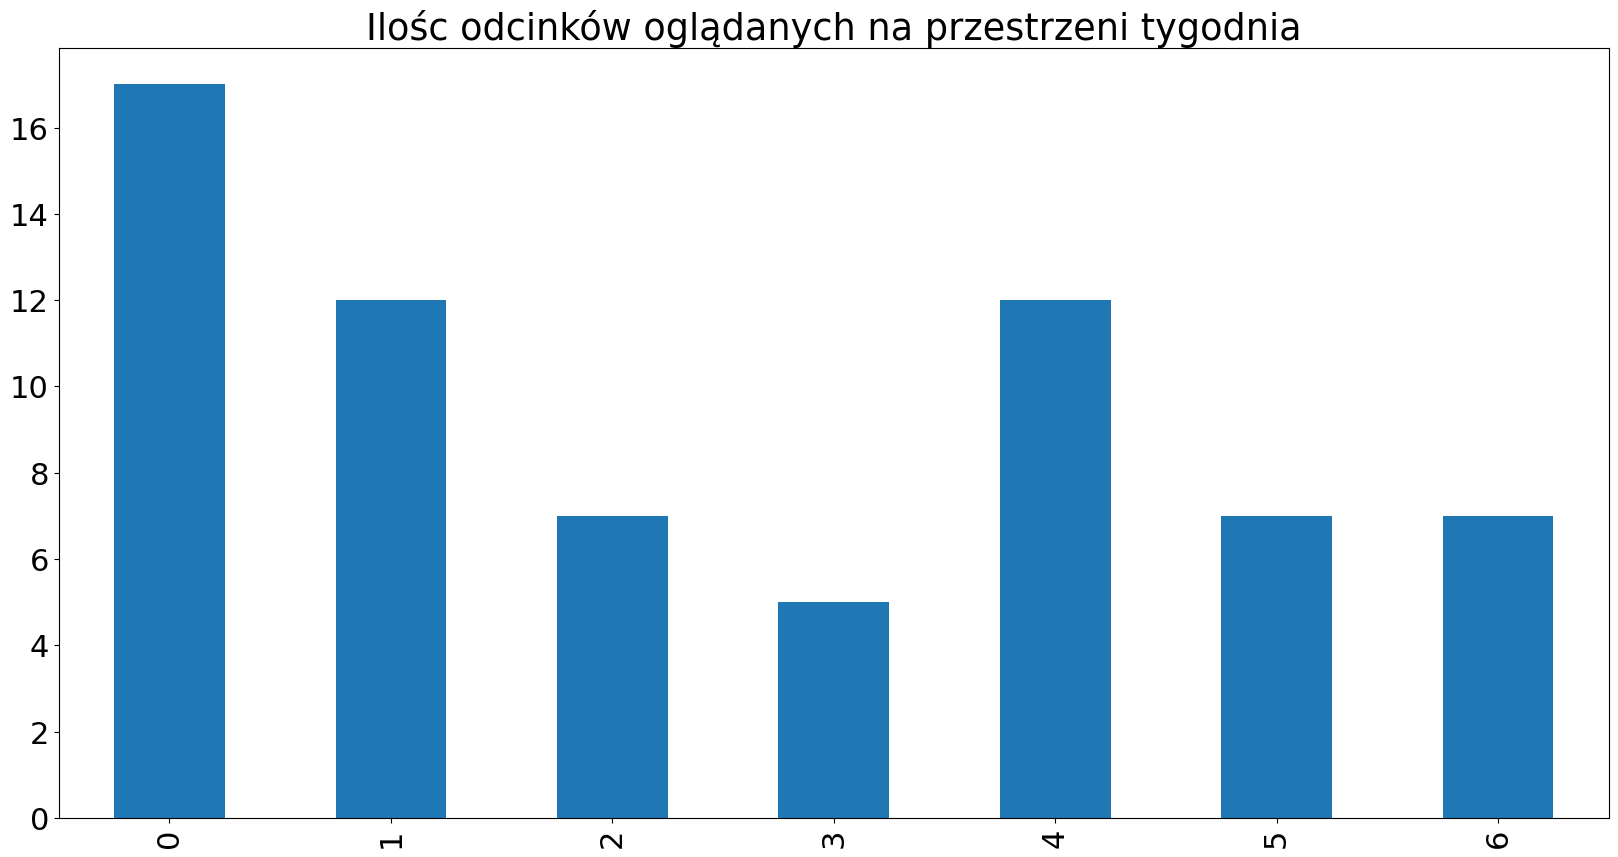

In [33]:
#tworzymy kategorie dni w kolejnośc od poniedziałku do niedzieli
domZPapieru['Dzien_tygodnia'] = pd.Categorical(domZPapieru['Dzien_tygodnia'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

#zliczanie wartości z tygodnia
domZPapieru_by_day = domZPapieru['Dzien_tygodnia'].value_counts()
domZPapieru_by_day = domZPapieru_by_day.sort_index()

#większe litery żeby łatiwej było odczytać
matplotlib.rcParams.update({'font.size': 22})

domZPapieru_by_day.plot(kind='bar', figsize=(20,10), title='Ilośc odcinków oglądanych na przestrzeni tygodnia')

<Axes: title={'center': 'O której godzinie zaczynałem oglądać odcinki'}>

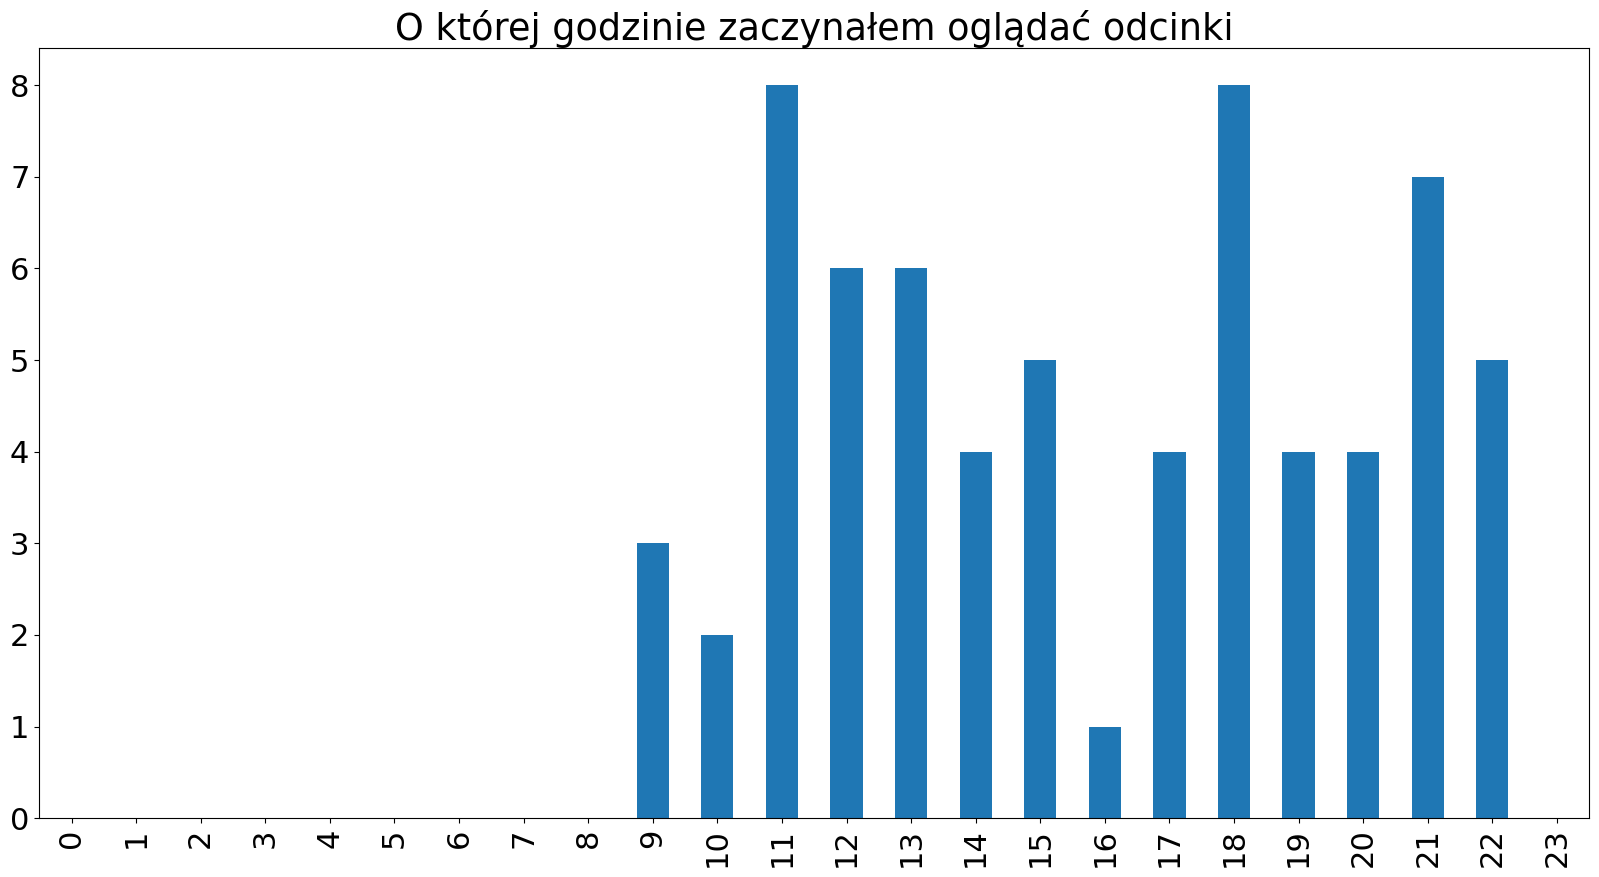

In [34]:
#podobnie jest z tworzeniem diagramu dotyczącego oglądalnosci w trakcie dnia
domZPapieru['Godzina'] = pd.Categorical(domZPapieru['Godzina'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

domZPapieru_by_Godzina = domZPapieru['Godzina'].value_counts()
domZPapieru_by_Godzina = domZPapieru_by_Godzina.sort_index()

domZPapieru_by_Godzina.plot(kind='bar', figsize=(20,10), title='O której godzinie zaczynałem oglądać odcinki')